# Importing Libraries and Reading the Dataset from csv file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("./Data/schizophrenia_dataset.csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Hasta_ID                 10000 non-null  int64
 1   Yaş                      10000 non-null  int64
 2   Cinsiyet                 10000 non-null  int64
 3   Eğitim_Seviyesi          10000 non-null  int64
 4   Medeni_Durum             10000 non-null  int64
 5   Meslek                   10000 non-null  int64
 6   Gelir_Düzeyi             10000 non-null  int64
 7   Yaşadığı_Yer             10000 non-null  int64
 8   Tanı                     10000 non-null  int64
 9   Hastalık_Süresi          10000 non-null  int64
 10  Hastaneye_Yatış_Sayısı   10000 non-null  int64
 11  Ailede_Şizofreni_Öyküsü  10000 non-null  int64
 12  Madde_Kullanımı          10000 non-null  int64
 13  İntihar_Girişimi         10000 non-null  int64
 14  Pozitif_Semptom_Skoru    10000 non-null  int64
 15  Neg

In [4]:
df = df.rename(columns={"Hasta_ID": "Patient_ID",
                        "Yaş": "Age",
                        "Cinsiyet": "Gender",
                        "Eğitim_Seviyesi": "Education_Level",
                        "Medeni_Durum": "Marital_Status",
                        "Meslek": "Occupation",
                        "Gelir_Düzeyi": "Income_Level",
                        "Yaşadığı_Yer": "Place_of_Residence",
                        "Tanı": "Diagnosis",
                        "Hastalık_Süresi": "Duration_of_Illness",
                        "Hastaneye_Yatış_Sayısı": "Number_of_Hospitalizations",
                        "Ailede_Şizofreni_Öyküsü": "Schizophrenia_History_in_Family",
                        "Madde_Kullanımı": "Substance_Use",
                        "İntihar_Girişimi": "Suicide_Attempts",
                        "Pozitif_Semptom_Skoru": "Positive_Symptom_Score",
                        "Negatif_Semptom_Skoru": "Negative_Symptom_Score",
                        "GAF_Skoru": "GAF_Score",
                        "Sosyal_Destek": "Social_Support",
                        "Stres_Faktörleri": "Stress_Factors",
                        "İlaç_Uyumu": "Medication_Adherence"})

In [5]:
df.head()

,Patient_ID,Age,Gender,Education_Level,Marital_Status,Occupation,Income_Level,Place_of_Residence,Diagnosis,Duration_of_Illness,Number_of_Hospitalizations,Schizophrenia_History_in_Family,Substance_Use,Suicide_Attempts,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [6]:
df.isna().sum()

Patient_ID                         0
Age                                0
Gender                             0
Education_Level                    0
Marital_Status                     0
Occupation                         0
Income_Level                       0
Place_of_Residence                 0
Diagnosis                          0
Duration_of_Illness                0
Number_of_Hospitalizations         0
Schizophrenia_History_in_Family    0
Substance_Use                      0
Suicide_Attempts                   0
Positive_Symptom_Score             0
Negative_Symptom_Score             0
GAF_Score                          0
Social_Support                     0
Stress_Factors                     0
Medication_Adherence               0
dtype: int64

In [7]:
df.describe()

,Patient_ID,Age,Gender,Education_Level,Marital_Status,Occupation,Income_Level,Place_of_Residence,Diagnosis,Duration_of_Illness,Number_of_Hospitalizations,Schizophrenia_History_in_Family,Substance_Use,Suicide_Attempts,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.867700,0.502600,3.042600,1.518200,1.510600,0.996900,0.499400,0.288700,5.859000,1.440300,0.319600,0.217700,0.08840,39.019000,39.4614,67.031800,0.992500,0.998700,1.137500
std,2886.89568,18.215054,0.500018,1.423021,1.117315,1.114097,0.817531,0.500025,0.453181,11.066814,2.824152,0.466345,0.412703,0.28389,27.276962,27.0175,23.999833,0.813578,0.817169,0.821378
min,1.00000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,10.000000,0.000000,0.000000,0.000000
25%,2500.75000,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,18.0000,54.000000,0.000000,0.000000,0.000000
50%,5000.50000,49.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,35.0000,72.000000,1.000000,1.000000,1.000000
75%,7500.25000,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,5.250000,1.000000,1.000000,0.000000,0.00000,57.000000,57.0000,86.000000,2.000000,2.000000,2.000000
max,10000.00000,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,40.000000,10.000000,1.000000,1.000000,1.00000,100.000000,100.0000,100.000000,2.000000,2.000000,2.000000


## Plots

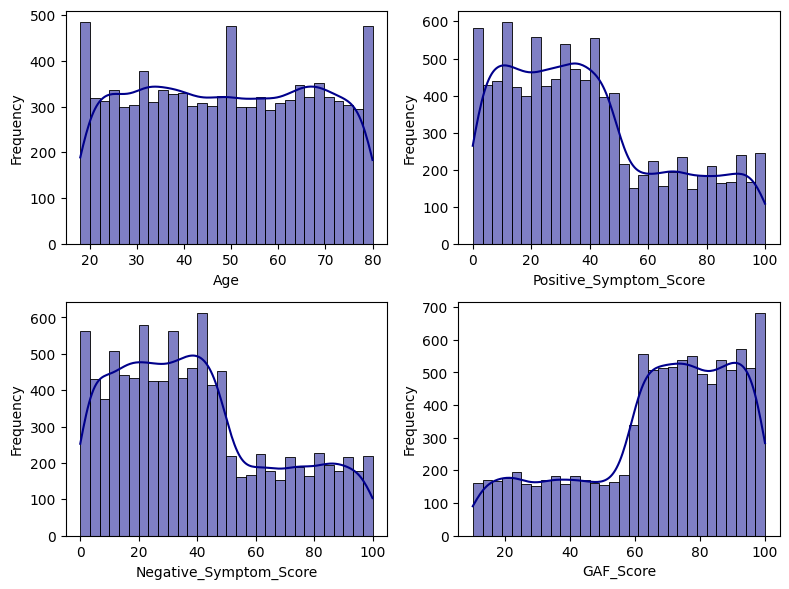

In [8]:
df_num = ['Age', 'Positive_Symptom_Score', 'Negative_Symptom_Score', 'GAF_Score']

fig = plt.figure(figsize=(8, 6))

for i, feature in enumerate(df_num):
    ax = fig.add_subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='darkblue')
    plt.xlabel(feature)
    plt.ylabel("Frequency")


fig.tight_layout()
plt.show()

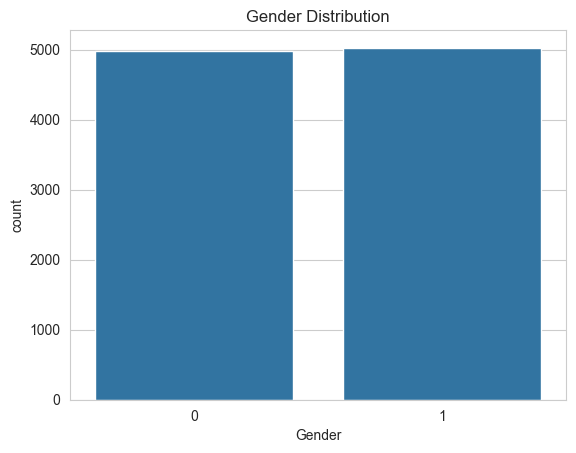

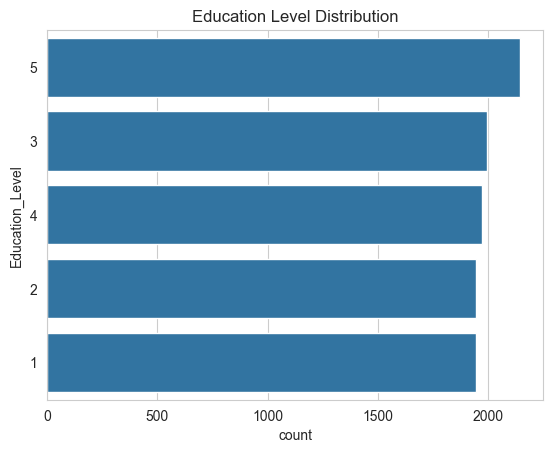

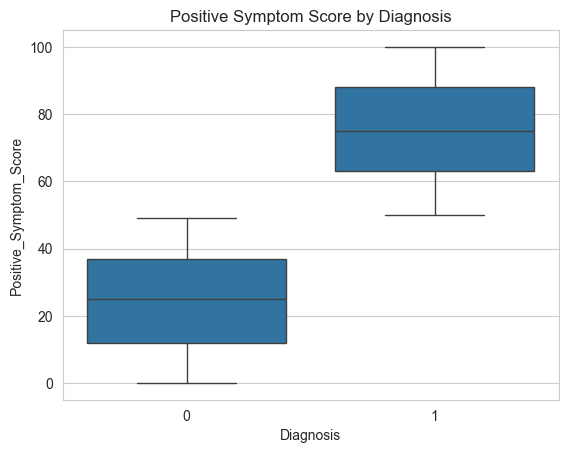

In [9]:
sns.set_style("whitegrid")

# 1. Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# 2. Education Level
sns.countplot(y='Education_Level', data=df, order=df['Education_Level'].value_counts().index)
plt.title("Education Level Distribution")
plt.show()

# 3. Box Plot: Positive Symptoms by Diagnosis
sns.boxplot(x='Diagnosis', y='Positive_Symptom_Score', data=df)
plt.title("Positive Symptom Score by Diagnosis")
plt.show()

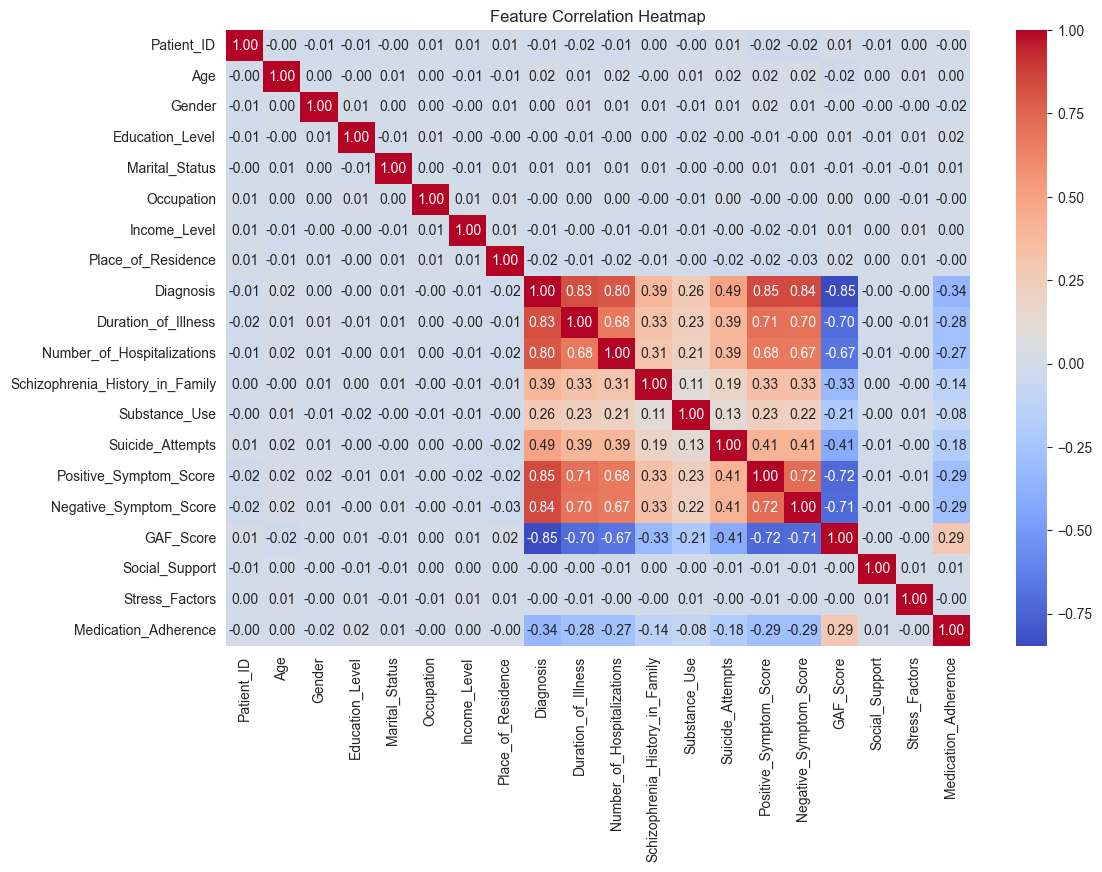

In [10]:
# 4. Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Correlation with Target Variable "Diagnosis"

In [11]:
print(df.corr()["Diagnosis"].sort_values(ascending=False))

Diagnosis                          1.000000
Positive_Symptom_Score             0.846972
Negative_Symptom_Score             0.843931
Duration_of_Illness                0.831047
Number_of_Hospitalizations         0.800552
Suicide_Attempts                   0.488795
Schizophrenia_History_in_Family    0.390557
Substance_Use                      0.264959
Age                                0.019215
Marital_Status                     0.010262
Gender                             0.004411
Occupation                        -0.000416
Education_Level                   -0.001394
Stress_Factors                    -0.001687
Social_Support                    -0.003621
Income_Level                      -0.010541
Patient_ID                        -0.014767
Place_of_Residence                -0.023730
Medication_Adherence              -0.340134
GAF_Score                         -0.847212
Name: Diagnosis, dtype: float64


# Train-Test Splitting

In [12]:
X = df.drop(columns=["Patient_ID",
                     "Diagnosis",
                     "Positive_Symptom_Score", # Removing due to data leakage
                     "Negative_Symptom_Score", # Removing due to data leakage
                     "Duration_of_Illness", # Removing due to data leakage
                     "Number_of_Hospitalizations", # Removing due to data leakage
                     "GAF_Score" # Removing due to data leakage
                    ])
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [13]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

7000
7000
3000
3000


## Scaling the Data

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Balanced/Imbalanced check

In [15]:
df["Diagnosis"].value_counts()

Diagnosis
0    7113
1    2887
Name: count, dtype: int64

## Resampling with SMOTE for Imbalanced Data

In [16]:
y_train.value_counts()

Diagnosis
0    4998
1    2002
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
y_resampled.value_counts()

Diagnosis
0    4998
1    4998
Name: count, dtype: int64

# Model Fitting





## 1. Logistic Regression

In [19]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [20]:
y_pred = log_reg.predict(X_test)
y_probs = log_reg.predict_proba(X_test)[:, 1]
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1830  285]
 [ 233  652]]


In [22]:
log_reg_report = classification_report(y_test, y_pred, digits=4)
print(log_reg_report)
log_reg_acc = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8871    0.8652    0.8760      2115
           1     0.6958    0.7367    0.7157       885

    accuracy                         0.8273      3000
   macro avg     0.7914    0.8010    0.7959      3000
weighted avg     0.8306    0.8273    0.8287      3000



### ROC Curve and AUC Value for the Model

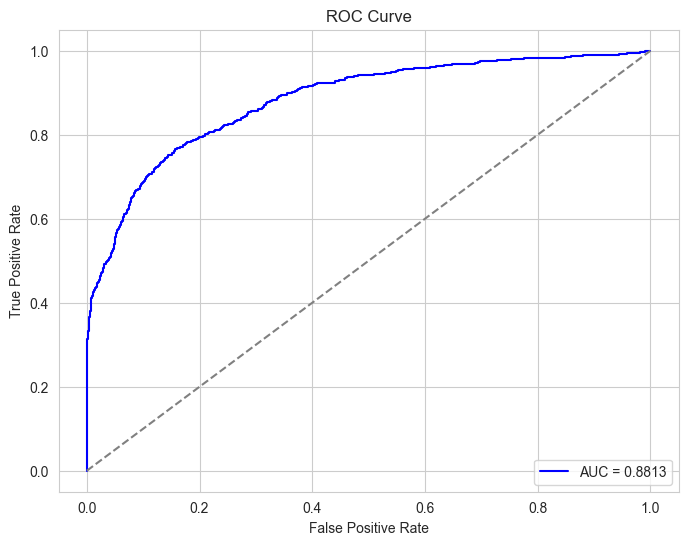

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 2. Naive Bayes Classification

In [25]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_resampled, y_resampled)

GaussianNB()

In [26]:
y_pred = gaussian_nb.predict(X_test)
y_probs = gaussian_nb.predict_proba(X_test)[:, 1]
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2115    0]
 [ 622  263]]


In [28]:
gaussian_nb_report = classification_report(y_test, y_pred, digits=4)
print(gaussian_nb_report)
gaussian_nb_acc = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.7727    1.0000    0.8718      2115
           1     1.0000    0.2972    0.4582       885

    accuracy                         0.7927      3000
   macro avg     0.8864    0.6486    0.6650      3000
weighted avg     0.8398    0.7927    0.7498      3000



### ROC Curve and AUC Value for the Model

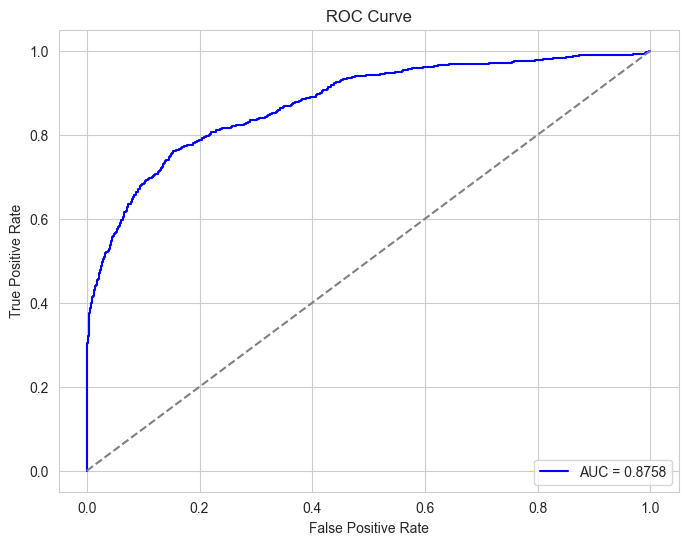

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 3. Decision Tree Classifier

In [30]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
y_pred = dtc.predict(X_test)
y_probs = dtc.predict_proba(X_test)[:, 1]
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1747  368]
 [ 343  542]]


In [33]:
dtc_report = classification_report(y_test, y_pred, digits=4)
print(dtc_report)
dtc_acc = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8359    0.8260    0.8309      2115
           1     0.5956    0.6124    0.6039       885

    accuracy                         0.7630      3000
   macro avg     0.7157    0.7192    0.7174      3000
weighted avg     0.7650    0.7630    0.7639      3000



### ROC Curve and AUC Value for the Model

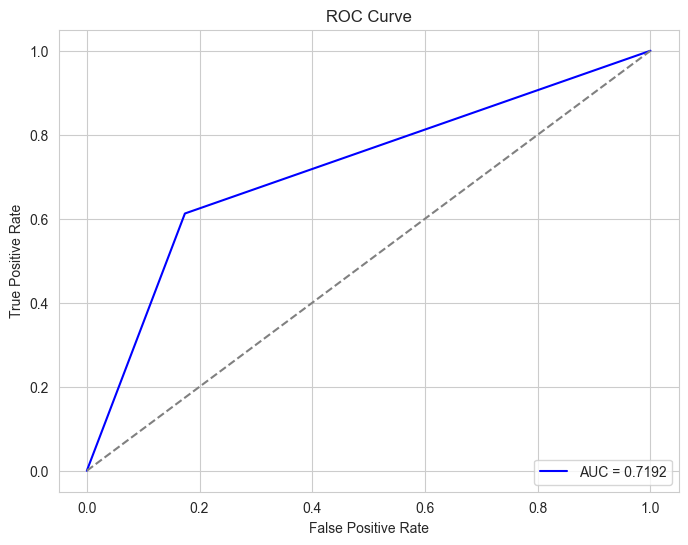

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 4. Random Forest Classification

In [35]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = rfc.predict(X_test)
y_probs = rfc.predict_proba(X_test)[:, 1]
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1945  170]
 [ 338  547]]


In [38]:
rfc_report = classification_report(y_test, y_pred, digits=4)
print(rfc_report)
rfr_acc = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8519    0.9196    0.8845      2115
           1     0.7629    0.6181    0.6829       885

    accuracy                         0.8307      3000
   macro avg     0.8074    0.7689    0.7837      3000
weighted avg     0.8257    0.8307    0.8250      3000



### ROC Curve and AUC Value for the Model

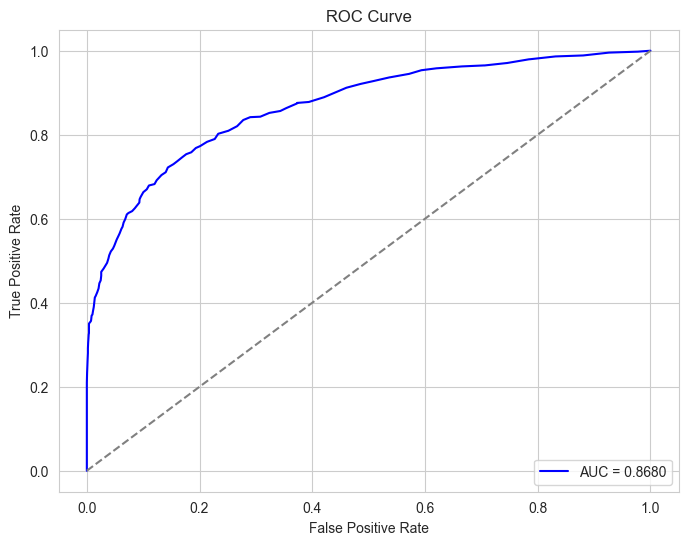

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 5. XGBoost

In [40]:
xgb = xg.XGBClassifier(random_state=42)
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
y_pred = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)[:, 1]
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1938  177]
 [ 351  534]]


In [43]:
xgb_report = classification_report(y_test, y_pred, digits=4)
print(xgb_report)
xgb_acc = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8467    0.9163    0.8801      2115
           1     0.7511    0.6034    0.6692       885

    accuracy                         0.8240      3000
   macro avg     0.7989    0.7599    0.7746      3000
weighted avg     0.8185    0.8240    0.8179      3000



### ROC Curve and AUC Value for the Model

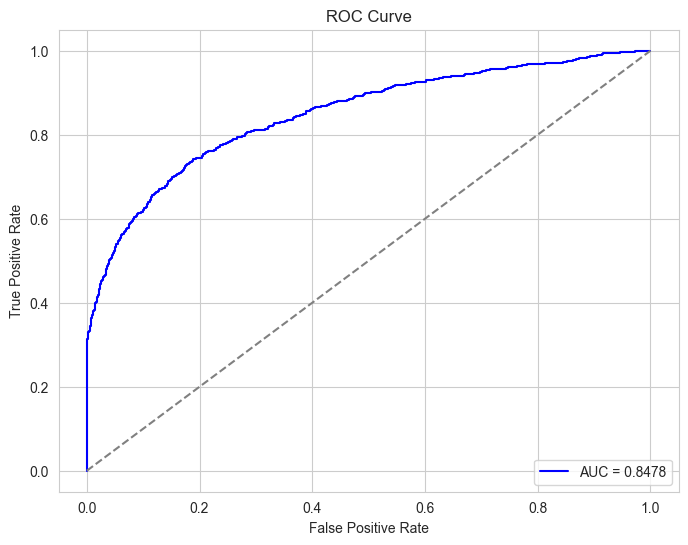

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Comparative Analysis

## Classification Reports of the Different Models

In [45]:
models = {"Logistic Regression": "log_reg_report",
          "Gaussian Naive Bayes": "gaussian_nb_report",
          "Decision Tree Regression": "dtc_report",
          "Random Forest Regression": "rfc_report",
          "XGBoost Regression": "xgb_report"
         }

for model, report in models.items():
    print(f"For {model}, the classification report is:\n")
    print(eval(report))
    print("---------------------------------------------------------------")

For Logistic Regression, the classification report is:

              precision    recall  f1-score   support

           0     0.8871    0.8652    0.8760      2115
           1     0.6958    0.7367    0.7157       885

    accuracy                         0.8273      3000
   macro avg     0.7914    0.8010    0.7959      3000
weighted avg     0.8306    0.8273    0.8287      3000

---------------------------------------------------------------
For Gaussian Naive Bayes, the classification report is:

              precision    recall  f1-score   support

           0     0.7727    1.0000    0.8718      2115
           1     1.0000    0.2972    0.4582       885

    accuracy                         0.7927      3000
   macro avg     0.8864    0.6486    0.6650      3000
weighted avg     0.8398    0.7927    0.7498      3000

---------------------------------------------------------------
For Decision Tree Regression, the classification report is:

              precision    recall  f1-score 

## Bar plot of the Accuracy scores

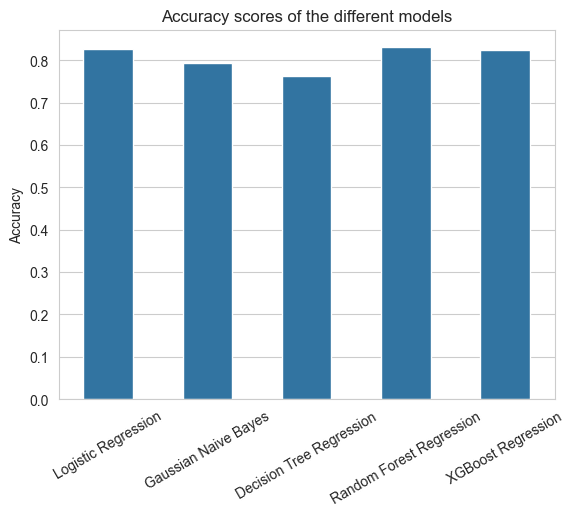

In [49]:
acc_list = [log_reg_acc, gaussian_nb_acc, dtc_acc, rfr_acc, xgb_acc]
sns.barplot(acc_list, width=0.5)
plt.title("Accuracy scores of the different models")
plt.xticks(ticks=range(len(acc_list)), labels=models.keys(), rotation=30)
plt.ylabel("Accuracy")
plt.show()